# Word Count with Map-Reduce - Lab

## Introduction

now that we have seen the key map and reduce operators in spark, and also know when to use transformation and action operators, we can revisit the word count problem we introduced earlier in the section. In this lab, we will use the methods seen in the coding labs to read a text corpus into spark environment, perform a word count and try basic NLP ideas to get a good grip on how MapReduce performs. 

Note: In your Pyspark environment, create a folder `data` and move all the files from the provided `data` folder into it. Jupyter interface doesnt allow moving complete folders. 

## Objectives

You will be able to:

* Describe Map-Reduce operation in a big data context
* Perform basic NLP tasks with a given text corpus
* Perform basic analysis from the experiment findings towards identifying writing styles

## Map-Reduce task

Here is what our problem looks like:

* We have a huge text document
* We need to count the number of times each distinct word appears in the document


* Sample application:

    * Analyze web server logs to find popular URLs
    * Analyze texts for content or style 

## Word Count

We will illustrate a MapReduce computation for counting the number of occurrences for each word in a text corpus. In this example, the input file is a repository of documents, and each document is an element. We shall count the frequency of stop words for __style identification__ as stop words might have unique features which can potentially describe author's writing style based on their use of stop words while writing. We shall look at some texts by Shakspeare and Jane Austin following this motivation. 

Map-Reduce in PySpark provides a practical and efficient way of achieving this goal as it: 

* works if the file is too large for memory

* works even if the ouput is too large for memory

* is naturally parallelizable


### Map-Reduce Framework

Here are the steps that we will perform for our problem, under the map reduce framework. 

* Sequentially read a lot of data (text files in this case)


* Map:
    * Extract something you care about


* Group by key: Sort and Shuffle


* Reduce:
    * Aggregate, summarize, filter or transform


* Write the result 

Here is what it looks like visually: 
![](wc1.png)

### Initialize SparkContext()

Let's import the pyspark module into python environment and initialize a `SparkContext()`

- Initialize a local spark context

In [1]:
# Start a local SparkContext
import pyspark
sc = pyspark.SparkContext('local[*]')

To test our code, we shall start with a single text file, hamlet.txt. First we shall set a file path variable.

set a file path variable `file` to the location of `hamlet.txt`

In [2]:
# Set a path variable for data 
file = 'text/hamlet.txt'
file

'text/hamlet.txt'

## Read and Split text file contents into RDD - `sc.textFile()`

Previously we used the parallalization to read an RDD from a python list. Here we shall read the text file into Spark RDDs by using `sc.textFile()` method for loading the text file into the `lines` RDD. The documentation on RDDs can be found [here!!](https://spark.apache.org/docs/latest/rdd-programming-guide.html)

`textFile(path)` method reads a text file from HDFS/local file system/any hadoop supported file system, into the number of partitions specified and returns it as an RDD of Strings. In order to view the contents of RDD, we will use `RDD.collect()` method as calling the RDD by name will not return the contents, only the object type and relevant information 

In [3]:
# Read the text file into an RDD using sc.textFile()
RDD = sc.textFile(file)

The text file has been written in a "line-by-line" manner into the RDD. We can access any given entry using simple indexing. 

- Print a few sample lines from the `lines` RDD

In [4]:
for line in RDD.collect()[:25]:
    print(line)


1604


THE TRAGEDY OF HAMLET, PRINCE OF DENMARK


by William Shakespeare



Dramatis Personae

  Claudius, King of Denmark.
  Marcellus, Officer.
  Hamlet, son to the former, and nephew to the present king.
  Polonius, Lord Chamberlain.
  Horatio, friend to Hamlet.
  Laertes, son to Polonius.
  Voltemand, courtier.
  Cornelius, courtier.
  Rosencrantz, courtier.
  Guildenstern, courtier.
  Osric, courtier.
  A Gentleman, courtier.


Similarly , we can also print the whole document, lines by line. 

- Print complete hamlet from the lines RDD

In [5]:
# Print the text, line-by-line
# This will output the whole of hamlet text, one line at a time. 


for line in RDD.collect():
    print(line)


1604


THE TRAGEDY OF HAMLET, PRINCE OF DENMARK


by William Shakespeare



Dramatis Personae

  Claudius, King of Denmark.
  Marcellus, Officer.
  Hamlet, son to the former, and nephew to the present king.
  Polonius, Lord Chamberlain.
  Horatio, friend to Hamlet.
  Laertes, son to Polonius.
  Voltemand, courtier.
  Cornelius, courtier.
  Rosencrantz, courtier.
  Guildenstern, courtier.
  Osric, courtier.
  A Gentleman, courtier.
  A Priest.
  Marcellus, officer.
  Bernardo, officer.
  Francisco, a soldier
  Reynaldo, servant to Polonius.
  Players.
  Two Clowns, gravediggers.
  Fortinbras, Prince of Norway.  
  A Norwegian Captain.
  English Ambassadors.

  Getrude, Queen of Denmark, mother to Hamlet.
  Ophelia, daughter to Polonius.

  Ghost of Hamlet's Father.

  Lords, ladies, Officers, Soldiers, Sailors, Messengers, Attendants.





SCENE.- Elsinore.


ACT I. Scene I.
Elsinore. A platform before the Castle.

Enter two Sentinels-[first,] Francisco, [who paces up and down
at his p

Great, now that we have the complete text files into `lines` RDD, we can easily use map function to break it down further into individual words and parallelize it accordingly. 

__Note: Parallelization is handled by Spark environment according to available infrastructure and doesn't need any further configuration__.

## The MAP function `map(func)`

The Map function for this example uses keys that are of type String (the words) and values that are integers. The Map task reads a document and breaks it into its sequence of words `w1, w2, . . . , wn`. It then emits a sequence of key-value pairs for each word where the word iteself is the key and the value is always 1. That is, the output of the Map task for this document is the sequence of key-value pairs as shown below:

> `(w1, 1), (w2, 1), . . . ,(wn, 1)`

This step performs the following two sub-steps:

* Splitting step takes input DataSet from Source and divide into smaller Sub-Sets.
* Mapping step takes those smaller Sub-DataSets and perform required action or computation on each Sub-DataSet.


### Spark Mapping functions

Previously, we saw that:

- `map(func)`	returns a new distributed dataset formed by passing each element of the source through a function `func`.

- `flatMap(func)` maps each input item to 0 or more output items (so `func` should return a Seq rather than a single item).

`flatMap()` breaks the output of the lambda function into individual RDD elements (as opposed to map).

---

* Use `RDD.flatMap` to split the lines by the spaces and collect into one flat RDD.

* The transformation is defined in the lambda expression, where the input x is defined as producing result  
`x.split(' ')`.

* Use the `RDD.take(n)` method to pick n words from the top of the sequence. n=10

`flatMap()` breaks the output of the lambda function into individual RDD elements (as opposed to map).


In [6]:
# split the lines into words based on blanks ' ' and show ten elements from the top 

words = RDD.flatMap(lambda x: x.split(' '))
words.take(10)

# ['', '1604', '', '', 'THE', 'TRAGEDY', 'OF', 'HAMLET,', 'PRINCE', 'OF']

['', '1604', '', '', 'THE', 'TRAGEDY', 'OF', 'HAMLET,', 'PRINCE', 'OF']


### Create a Tuple as (k,v)

- Map each words to a tuple of (word, 1).

Map doesn't break up the output of the lambda expression, so that the tuples stay intact.

In [7]:
# Use a lambda function with map to add a 1 to each word and output a tuple
# (word, 1) - Take ten elements

word_counts = words.map(lambda x: (x, 1))
word_counts.take(10)


[('', 1),
 ('1604', 1),
 ('', 1),
 ('', 1),
 ('THE', 1),
 ('TRAGEDY', 1),
 ('OF', 1),
 ('HAMLET,', 1),
 ('PRINCE', 1),
 ('OF', 1)]

### Change the words to lower case to ensure integrity

As we can see from the output above, the text contains words in capital as well as lower case. By default, 'THE' and 'the' would be considered two separate words due to case sensitivity. 

- Modify the map function above to change all the words to lowercase using a `.lower()` inside the lambda function.


In [8]:
# Change the words in words tuples to lowercase - take 10 elements 

word_counts = words.map(lambda x: (x.lower(), 1))
word_counts.take(10)

[('', 1),
 ('1604', 1),
 ('', 1),
 ('', 1),
 ('the', 1),
 ('tragedy', 1),
 ('of', 1),
 ('hamlet,', 1),
 ('prince', 1),
 ('of', 1)]

## REDUCE Function
The Reduce function’s argument is a pair consisting of a key and its list of associated values as the pairs created above. The output of the Reduce function is a sequence of zero or more key-value pairs. These key-value pairs can be of a type different from those sent from Map tasks to Reduce tasks, but often they are the same type.

We shall refer to the application of the Reduce function to a single key and its associated list of values as a reducer.

![](reduce.png)

- Use `RDD.reduceByKey` to add up all the words. the new k,v pairs would have word as the key and number of occurances as a value. 

Here, the lambda has two arguments (x and y) that are added.

In [9]:
# USe reduceByKey with tuplesLCase to add all values under same keys - take 10

word_counts = word_counts.reduceByKey(lambda x, y: x+y)
word_counts.take(10)

[('', 20383),
 ('1604', 1),
 ('tragedy', 1),
 ('of', 670),
 ('prince', 2),
 ('denmark', 10),
 ('shakespeare', 1),
 ('dramatis', 1),
 ('claudius,', 2),
 ('king', 43)]

### Filter rare words

Following the standard NLP approach, we can add a filtering step to remove all words which appear less than some thershaold value, say, with less than 5 occurrences. 

This can be useful to identify common topics between documents, where very rare words can be misleading. 
For this step we shall use the `RDD.filter(func)` where func is a lambda function that filters out any word which appears less than or equal to 5 times. You may also use a spearate function to achieve this. 

- Remove rare words with occurences < 5 using lambda function inside a `.filter()` method. 

In [10]:
# Remove all rare words with frequency less than 5 - take 10 

word_counts = word_counts.filter(lambda x: x[1] >= 5)
word_counts.take(10)

[('', 20383),
 ('of', 670),
 ('denmark', 10),
 ('king', 43),
 ('son', 11),
 ('polonius,', 6),
 ('horatio,', 15),
 ('hamlet.', 25),
 ('courtier.', 7),
 ('rosencrantz,', 6)]

### List  Stopwords

Add a filtering step to retain only words included in a list of stopwords. 

Stopwords can be useful for recognising the style of an author. Removing stopwords can be useful in regocnising the topic of a document. For stopword removal, we use the `RDD.filter(func)` again with a lambda function that uses a stop word list to extract the key value pairs for only the words that are present in the stop word list. Use a simple list as the one shown below:
> ['', 'the','a','in','of','on','at','for','by','I','you','me'] 


- Use the stop word list above to count the occcurances of these words in the document
- Show stop word frequency

In [11]:
# show stopword frequency in the output
stopwords = ['', 'the','a','in','of','on','at','for','by','I','you','me']

stopword_counts = word_counts.filter(lambda x: x[0] in stopwords)
stopword_counts.collect()

[('', 20383),
 ('of', 670),
 ('at', 87),
 ('in', 420),
 ('the', 1083),
 ('by', 111),
 ('a', 540),
 ('you', 433),
 ('for', 231),
 ('me', 144),
 ('on', 108)]

### List of keep words

- Modify the filter operation above to keep all the words found in the text **except** the stop words. 

In [12]:
# Modify above filter to show top ten keep words by frequency

keepword_counts = word_counts.filter(lambda x: x[0] not in stopwords)
keepword_counts.collect()

[('denmark', 10),
 ('king', 43),
 ('son', 11),
 ('polonius,', 6),
 ('horatio,', 15),
 ('hamlet.', 25),
 ('courtier.', 7),
 ('rosencrantz,', 6),
 ('guildenstern,', 5),
 ('two', 23),
 ('fortinbras,', 6),
 ('queen', 18),
 ('ophelia,', 12),
 ('daughter', 8),
 ('ghost', 9),
 ("hamlet's", 9),
 ('father.', 8),
 ('act', 12),
 ('scene', 23),
 ('before', 17),
 ('castle.', 15),
 ('enter', 69),
 ('down', 14),
 ('his', 302),
 ('ber.', 19),
 ('fran.', 8),
 ('nay,', 22),
 ('stand', 12),
 ('long', 12),
 ('live', 13),
 ('upon', 53),
 ("'tis", 71),
 ('now', 54),
 ('this', 253),
 ('i', 523),
 ('am', 54),
 ('have', 176),
 ('well,', 21),
 ('good', 97),
 ('night.', 7),
 ('do', 131),
 ('meet', 5),
 ('horatio', 8),
 ('watch,', 6),
 ('bid', 6),
 ('them', 43),
 ('make', 53),
 ('think', 39),
 ('hear', 23),
 ('them.', 16),
 ('ho!', 7),
 ('is', 327),
 ('mar.', 31),
 ('give', 58),
 ('o,', 59),
 ('you?', 13),
 ('exit.', 17),
 ('there', 52),
 ('welcome,', 7),
 ('horatio.', 11),
 ('again', 9),
 ('seen', 17),
 ('says',

### Putting it all together 

Combine above code as a function and pass on three works of Shakespeare (romeandjuliet.txt, hamlet.txt, othello.txt) and observe the frequency of stop words. Repeat the same exercise for three works of Jane Austin (senseandsensibility.txt, prideandprejudice.txt and emma.txt). 

> Can you recognise the writing styles of these authors based on their use of stop words ?
> What can you do to improve the style recognition ability ??

In [16]:
import os
os.listdir('text/')

['senseandsensibility 2.txt',
 'othello.txt',
 'emma.txt',
 'romeoandjuliet.txt',
 'prideandprejudice.txt',
 'hamlet.txt']

In [20]:
# Create a function for word count that takes in a file name and stop wordlist to perform above tasks
def wordCount(filename, stopWordlist):
    RDD = sc.textFile(f'text/{filename}')
    
    words = RDD.flatMap(lambda x: x.split(' '))
    word_counts = words.map(lambda x: (x, 1))
    red_word_counts = word_counts.reduceByKey(lambda x, y: x+y)
    no_rare_words = red_word_counts.filter(lambda x: x[1] >= 5)
    stopword_counts = no_rare_words.filter(lambda x: x[0] in stopWordlist)
    return dict(stopword_counts.collect())

In [30]:
shakespeare = dict((word,0) for word in stopwords)

for file in ['hamlet.txt', 'othello.txt', 'romeoandjuliet.txt']:
    word_dict = wordCount(file, stopwords)
    for key in word_dict.keys():
        shakespeare[key] += word_dict[key]
        
shakespeare

{'': 27953,
 'the': 2311,
 'a': 1335,
 'in': 982,
 'of': 1560,
 'on': 273,
 'at': 212,
 'for': 526,
 'by': 293,
 'I': 1932,
 'you': 1028,
 'me': 523}

In [31]:
ja = dict((word,0) for word in stopwords)

for file in ['emma.txt', 'prideandprejudice.txt', 'senseandsensibility 2.txt']:
    word_dict = wordCount(file, stopwords)
    for key in word_dict.keys():
        ja[key] += word_dict[key]
        
ja

{'': 13513,
 'the': 13330,
 'a': 7034,
 'in': 5858,
 'of': 11746,
 'on': 1931,
 'at': 2557,
 'for': 3471,
 'by': 1955,
 'I': 5943,
 'you': 3245,
 'me': 828}

In [36]:
shakes_word_count = sum(shakespeare.values())
ja_word_count = sum(ja.values())

In [37]:
for key in ja.keys():
    shakespeare[key] = shakespeare[key] / shakes_word_count
    ja[key] = ja[key] / ja_word_count

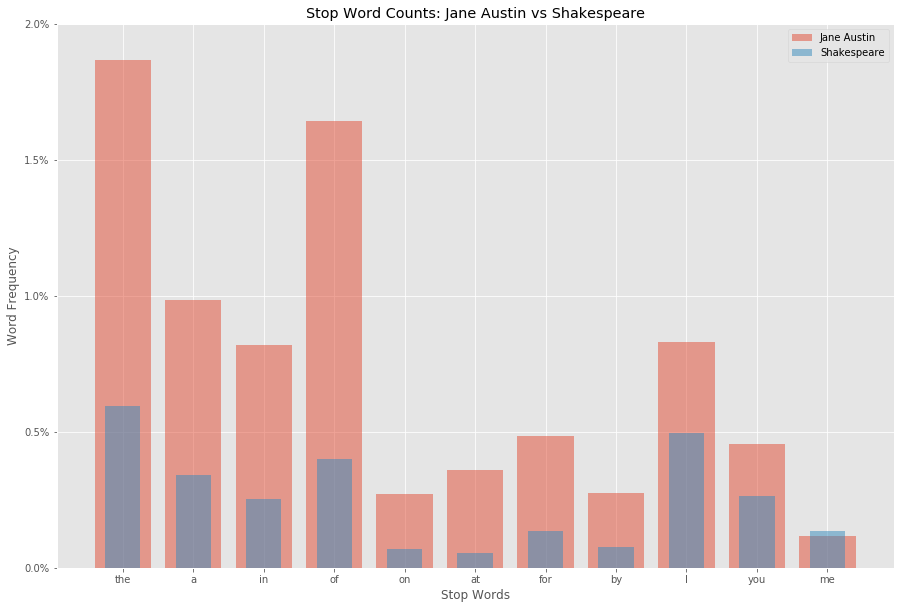

In [51]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x_vals = list(ja.keys())[1:]

plt.figure(figsize=(15, 10))
plt.bar(x_vals, [ja[key] for key in x_vals], label='Jane Austin', alpha=.5)
plt.bar(x_vals, [shakespeare[key] for key in x_vals], label='Shakespeare', alpha=.5, width=.5)
plt.legend()
plt.xlabel('Stop Words')
plt.ylabel('Word Frequency')
plt.yticks([i/100 for i in range(0, 21, 5)], [f'{i/10}%' for i in range(0, 21, 5)])
plt.title('Stop Word Counts: Jane Austin vs Shakespeare')
plt.show()

These distributions are very distinct. It should be quite easy to distinguish the writing styles based on these words alone.

## Summary 

In this simple exercise , we saw map-reduce in action towards solving a basic NLP task i.e. counting the stop words and keep words frequency of a text corpus. This exercise can be seen as a first step towards text analytics on big data platforms. After this lab, we will get into more advanced use cases of pyspark, specifically for machine learning applications.
